# Intro

This is a simple tool to allow scripting of the awesome [XRT website](https://www.swift.ac.uk/xrt_products/index.php). The official API (which does a lot more) can be found [here](https://www.swift.ac.uk/user_objects/API/).

These tools extend the functionality a bit.

In [1]:
%matplotlib inline

from xrt_spec_dl import XRTLightCurve, download_xrt_spectral_data

## Downloading Spectra

This allows you to download time-sliced spectra for spectral analysis. You can choose PC or WT mode.

In [2]:
obs_id = "01071993"

grb = "210905A"

In [3]:
download_xrt_spectral_data(
    obs_id=obs_id,
    name=f"GRB {grb}",
    mode="PC",
    tstart=239,
    tstop=446,
    destination_dir=".",
)


!ls

[INFO    ] requesting build...


[INFO    ] sleeping 30 seconds ...


[INFO    ] requesting https://www.swift.ac.uk/xrt_spectra/tprods/SLICE_01071993_23.101.157.128_0MFk0bAmP/ ...


[INFO    ] sleeping 30 seconds ...


[INFO    ] sleeping 30 seconds ...


[INFO    ] sleeping 30 seconds ...


[INFO    ] sleeping 30 seconds ...


[INFO    ] sleeping 30 seconds ...


[INFO    ] sleeping 30 seconds ...


[INFO    ] sleeping 30 seconds ...


[INFO    ] sleeping 30 seconds ...


[INFO    ] sleeping 30 seconds ...


[INFO    ] downloading: https://www.swift.ac.uk/xrt_spectra/tprods/SLICE_01071993_23.101.157.128_0MFk0bAmP/xrt.tar.gz


GRB_info.txt  _stub    apc.arf	apc.rmf      apcback.pi    docs.md  xrt.tar.gz
README.txt    a.areas  apc.pi	apc_fit.fit  apcsource.pi  models


## Downloading Light curves

To get the light curve data for plotting purposes, we need to know the obs_id of the GRB. the class will look at the Swift data online and pull it for making plots. In the future, a cache options will be included for off-line use.


In [4]:
lc = XRTLightCurve(obs_id=obs_id)

The WT and PC data exist as astropy tables.

In [5]:
lc.wt_data

<Table length=144>
  time  time_perr time_nerr   rate   ... rate_nerr    bkg     bkg_err  fracexp
float64  float64   float64  float64  ...  float64   float64   float64  float64
------- --------- --------- -------- ... --------- --------- --------- -------
   98.6     0.494    -0.587 46.12369 ... -6.876381       0.0       0.0     1.0
 99.793     0.649    -0.699 37.26021 ... -5.604468 0.5035006 0.5035006     1.0
101.143     0.645      -0.7 36.53476 ... -5.558484 0.5048367 0.5048367     1.0
102.437     0.689    -0.649 37.29176 ... -5.559588       0.0       0.0     1.0
103.504      0.48    -0.379 58.05943 ... -8.655572       0.0       0.0     1.0
104.747     0.522    -0.763   38.841 ... -5.790403       0.0       0.0     1.0
106.056     0.701    -0.787 33.54494 ... -5.000809       0.0       0.0     1.0
107.234     0.497    -0.478 49.62938 ... -7.706513  1.392896  0.984926     1.0
108.318     0.716    -0.586 38.25407 ... -5.702744       0.0       0.0     1.0
109.571     0.641    -0.537 40.87582 ...  -6.34723   1.15304 0.8153224     1.0
    ...       ...       ...      ... ...       ...       ...       ...     ...
402.092     0.367    -0.343 69.74111 ... -10.39647       0.0       0.0     1.0
402.756     0.357    -0.298 75.61507 ... -11.27211       0.0       0.0     1.0
403.503     0.498     -0.39 54.92238 ... -8.355314 0.7648364 0.7648364     1.0
404.439     0.381    -0.438 60.49167 ... -9.017632       0.0       0.0     1.0
405.171     0.338    -0.352  70.6357 ... -10.74577 0.9836565 0.9836565     1.0
  405.8     0.315     -0.29 81.84292 ... -12.20051       0.0       0.0     1.0
406.683     0.371    -0.568 52.70102 ... -7.856261       0.0       0.0     1.0
407.448     0.306    -0.395 70.62479 ...  -10.5282       0.0       0.0     1.0
 408.24     0.547    -0.485 47.25271 ... -7.188536 0.6580304 0.6580304     1.0
409.253     0.494    -0.466 51.53035 ... -7.681759       0.0       0.0     1.0

In [6]:
lc.pc_data

<Table length=46>
    time     time_perr   time_nerr  ...     bkg        bkg_err    fracexp 
  float64     float64     float64   ...   float64      float64    float64 
----------- ----------- ----------- ... ------------ ------------ --------
    257.813      11.352      -8.706 ...   0.00582634   0.00291317      1.0
    279.741       9.483     -10.576 ...  0.004369748  0.002522875      1.0
    297.701       9.074      -8.477 ...          0.0          0.0      1.0
    315.513       8.813      -8.738 ...  0.003329336  0.002354196      1.0
    332.385       4.478      -8.059 ...  0.009322149  0.004661075      1.0
    342.069       4.822      -5.207 ...   0.01748003  0.007136194      1.0
   3826.069      53.282     -44.503 ...   0.00193411 0.0006447033      1.0
   3927.847      66.841     -48.496 ...  0.001821987 0.0005761628      1.0
   4028.385      18.957     -33.697 ... 0.0007982025 0.0005644144      1.0
   4101.667      40.954     -54.324 ...  0.001764449  0.000623827      1.0
        ...         ...         ... ...          ...          ...      ...
 211078.674   12890.825   -23281.86 ... 0.0005820454 4.399849e-05 0.072087
 308026.999   18423.279  -40412.385 ... 0.0004166289  2.93139e-05 0.060386
 393391.557   12736.906   -5542.598 ... 0.0004718114 3.058299e-05 0.175571
 529458.552   38371.242  -26029.145 ... 0.0004642947 2.478222e-05  0.07444
 622744.928   52784.773  -27164.118 ... 0.0002677566 1.696839e-05 0.050178
 754403.214   59127.104  -27683.452 ... 0.0002468515 1.064253e-05 0.106461
  896943.44   14565.847   -9651.432 ... 0.0001883713 1.215932e-05 0.191537
1138445.996   42882.962  -61848.181 ... 0.0005433904 1.888412e-05 0.085922
 1418780.46  352287.473 -181877.223 ... 0.0003124656 7.748934e-06  0.03871
2570092.604 1007877.584 -272644.863 ... 0.0001492451 3.738143e-06 0.020244

Finally, we can plot the data

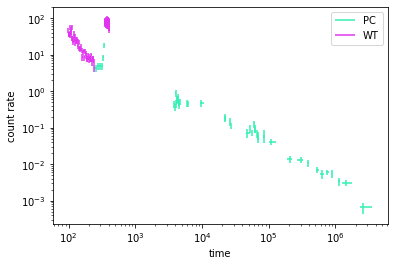

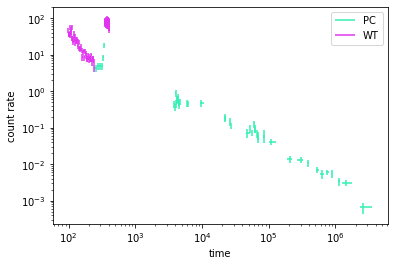

In [7]:
lc.plot(pc_mode=True, wt_mode=True)